# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$\omega_{new} = \omega_{old} - \alpha\bigtriangledown_{\omega}L(\omega)$$

$$\omega_{new} = \omega_{old} - 2\alpha(\frac{1}{n}\sum_{i=1}^n(\langle x_{i}, \omega_{old}\rangle-y_{i})x_{i} + \frac{\omega_{old}}{C})$$

Здесь  $\alpha\geqslant{0}$  - длина шага оптимизации. В общем случае она может быть задана как невозрастающая функция $f(k)$ от номера $k$ шага оптимизации.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$\omega_{new} = \omega_{old} - \alpha\nabla_{\omega}L(\omega)$$

$$\omega_{new} = \omega_{old} - \alpha(\frac{1}{nln2}\sum_{i=1}^n\frac{((1-y_{i})e^{\langle x_{i}, \omega_{old}\rangle}-y_{i})x_{i}}{e^{\langle x_{i}, \omega_{old}\rangle}+1}+\frac{2\omega_{old}}{C})$$

$$\omega_{new} = \omega_{old} - \alpha(\frac{1}{nln2}\sum_{i=1}^n\frac{((1-y_{i})-y_{i}e^{-\langle x_{i}, \omega_{old}\rangle})x_{i}}{1+e^{-\langle x_{i}, \omega_{old}\rangle}}+\frac{2\omega_{old}}{C})$$

$$\omega_{new} = \omega_{old} - \alpha(\frac{1}{nln2}\sum_{i=1}^n(\frac{1}{1+e^{-\langle x_{i}, \omega_{old}\rangle}}-y_{i})x_{i}+\frac{2\omega_{old}}{C})$$

Как оказалось, общая формула для линейной и логистической регрессий регрессий выглядит так:

$$\omega_{new} = \omega_{old} - \alpha(\frac{1}{n}sum_{i=1}^n(a(x_{i})-y_{i})x_{i}+\frac{\omega_{old}}{C})$$

$$\omega_{new} = \omega_{old} - \alpha(\frac{1}{n}\sum_{i=1}^n(a(x_{i})-y_{i})x_{i}+\frac{\omega_{old}}{C})$$
С точностью до константных множителей, не влияющих на сходимость вектора весов $\omega$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Гессиан функции $f(\omega)$ имеет вид

$$H(f(\omega)) = \begin{pmatrix}\frac{\partial^{2} f}{\partial\omega_{0}^{2}} & \frac{\partial^{2} f}{\partial\omega_{0}\partial\omega_{1}} & \ldots & \frac{\partial^{2} f}{\partial\omega_{0}\partial\omega_{D}} \\ \frac{\partial^{2} f}{\partial\omega_{1}\partial\omega_{0}} & \frac{\partial^{2} f}{\partial\omega_{1}^{2}} & \ldots & \frac{\partial^{2} f}{\partial\omega_{1}\partial\omega_{D}} \\\vdots & \vdots & \frac{\partial^{2} f}{\partial\omega_{i}\partial\omega_{j}} & \vdots \\ \frac{\partial^{2} f}{\partial\omega_{D}\partial\omega_{0}} & \frac{\partial^{2} f}{\partial\omega_{D}\partial\omega_{1}} & \ldots & \frac{\partial^{2} f}{\partial\omega_{D}^{2}} \end{pmatrix} $$

$$f(\omega) = \frac{1}{n}(\omega^{T}X^{T}X\omega - \omega^{T}X^{T}y-y^{T}X\omega + y^{T}y)$$

Поскольку деление на положительное число n не влияет на нахождение точки минимума функции, опустим множитель $\frac{1}{n}$

Поэтому гессиан $f(\omega)$ выглядит так:

$$H(f(\omega)) = 2\begin{pmatrix}x_{0}^{T}x_{0} & x_{0}^{T}x_{1} & \ldots & x_{0}^{T}x_{D} \\ x_{1}^{T}x_{0} & x_{1}^{T}x_{1} & \ldots & x_{1}^{T}x_{D} \\ \vdots & \vdots & x_{i}^{T}x_{j} & \vdots \\ x_{D}^{T}x_{0} & x_{D}^{T}x_{1} & \ldots & x_{D}^{T}x_{D} \end{pmatrix}$$

Это значит, что $H(f(\omega) = 2X^{T}X$. Тогда существует матрица $B = \sqrt{2}X$ такая, что $B^{T}B = H(f(\omega))$. Учитывая невырожденность матрицы $X$ (имеет строк не меньше, чем столбцов и полный ранг), получим, что $H(f(\omega))$ положительно определена.

L2 - регуляризация:

$$f(\omega) = \frac{1}{n}(\omega^{T}X^{T}X\omega - \omega^{T}X^{T}y - y^{T}X\omega + y^{T}y) + \frac{1}{C}\omega\omega^{T}$$
$$\nabla_{\omega}f(\omega) = 2X^{T}X\omega - 2X^{T}y + \frac{2}{C}\omega$$
$$\nabla_{\omega}f(\omega) = 0 \Leftrightarrow \omega = (X^{T}X + \frac{1}{C})^{-1}X^{T}y$$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$$dE(L|x_{i}) = \frac{1}{ln2}(\frac{-p(y_{i}=1|x_{i})}{a(x_{i})} + \frac{p(y_{i}=0|x_{i})}{1-a(x_{i})}$$
$$\frac{dE(L|x_{i})}{da(x_{i})} = \frac{-p(y_{i}=1|x_{i}) + a(x_{i})p(y_{i}=1|x_{i}) + a(x_{i})p(y_{i}=0|x_{i})}{ln2a(x_{i}(1-a(x_{i})))}$$
$p(y_{i}=1|x_{i}) + p(y_{i}=0|x_{i}) = 1$, значит, 
$$\frac{dE(L|x_{i})}{da(x_{i})} = 0 \Leftrightarrow a(x_{i}) = p(y_{i}=1|x_{i})$$, причем $a(x_{i}) \neq 1$, $a(x_{i}) \neq 0$
Это означает, что $a(x_{i}) = p(y_{i}=1|x_{i})$ - точка минимума мат. ожидания.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Да, нужно, 

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [104]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [105]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [106]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [107]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [108]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    X = np.array(X)
    y = np.array(y)
    if shuffle:
        available = np.array(range(y.size))
        while available.size > batch_size:
            indices = np.random.choice(np.arange(available.size), 
                                       size=batch_size, replace=False)
            current = available[indices]
            available = np.delete(available, indices)
            yield (X[current], y[current])
        yield (X[available], y[available])
    else :
        start = 0
        end = batch_size
        while y.size > end:
            yield (X[start:end], y[start:end])
            start += batch_size
            end += batch_size
        yield (X[start:], y[start:])

# Теперь можно сделать генератор по данным ()
#my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [176]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    try:
        sigm_value_x = 1 / (1 + np.e ** (-x))
        return sigm_value_x
    except OwerflowError:
        return 0.0
    
def my_log2(x):
    if x == 0.0:
        return -(2e+30)
    return np.log2(x)

def check(x):
    return all(x < 2e+30) and all(x > -2e+30)

def add_first_feature(X):
    res = np.array(X)
    to_add = np.array([1] * res.shape[0])
    to_add = to_add.reshape(-1, 1)
    return np.hstack((to_add, X))


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, batch_size=1, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', border=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        border - порог, при достижении которого объект относится к классу 1 (для log_reg)
        batch_size - размер батча
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.border = border
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        X_batch = add_first_feature(X_batch)
        y_batch = np.array(y_batch)
        n = X_batch.shape[0]
        
        if self.model_type is 'lin_reg':
            diff = np.matmul(X_batch, self.weights) - y_batch
            loss = np.dot(diff, diff)
        elif self.model_type is 'log_reg':
            loss = np.array(list(map(sigmoid, np.matmul(X_batch, self.weights))))
            l1 = loss[np.where(y_batch == 1)]
            l1 = np.array(list(map(my_log2, l1)))
            l0 = -loss[np.where(y_batch == 0)] + 1
            l0 = np.array(list(map(my_log2, l0)))
            loss = -(np.sum(l1) + np.sum(l0))
        loss  = loss / n + np.dot(self.weights, self.weights) / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss_grad = np.zeros(len(self.weights))
        X_batch = add_first_feature(X_batch)
        y_batch = np.array(y_batch)
        n = X_batch.shape[0]
        w = self.weights
        
        if self.model_type is 'lin_reg':
            loss_grad += np.dot(np.matmul(X_batch, w) - y_batch, X_batch)
        elif self.model_type is 'log_reg':
            loss_grad += np.dot(sigmoid(np.matmul(X_batch, w)) - y_batch, X_batch)
            loss_grad /= np.log(2)
            
        loss_grad /= n
        loss_grad += 2 * w / self.C
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        X = np.array(X)
        y = np.array(y)
        np.random.seed(0)
        self.weights = np.random.sample(X.shape[1] + 1)
        self.weights = self.weights.astype(float)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, shuffle=True, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        batch_loss = self.calc_loss(X, y)
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X_copy = add_first_feature(X)
        X_copy = np.array(list(map(lambda x: x if check(x) is True else 0, X_copy)))
        if self.model_type is 'lin_reg':
            y_hat = np.dot(X_copy, self.weights)
        elif self.model_type is 'log_reg':
            y_hat = X_copy * self.weights
            y_hat = y_hat.sum(axis=1)
            y_hat = y_hat.ravel()
            y_hat = np.array(list(map(lambda x: 1 if x > self.border else 0, y_hat)))
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [162]:
def plot_decision_boundary(clf):
    x = np.linspace(-10, 10)
    y = - (clf.weights[0] + x * clf.weights[1]) / clf.weights[2]
    line, = plt.plot(x, y, '-b', label='mySGD')

[-0.08130203  0.23897376 -0.13565709]


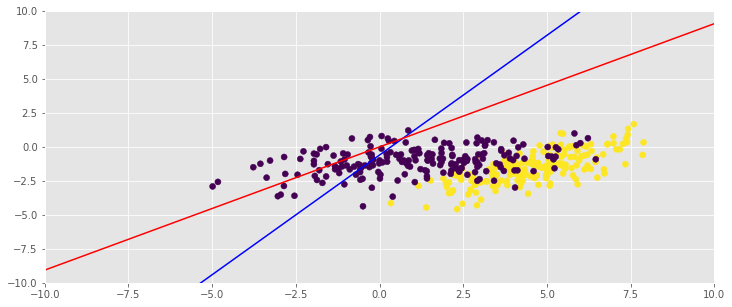

In [163]:
from sklearn.linear_model import SGDClassifier

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator, C=1, model_type='log_reg', alpha=0.05, border=0.5)
my_clf.fit(X, y)
sclearn_clf = SGDClassifier(loss='log')
sclearn_clf.fit(X, y)

sclearn_x = np.linspace(-10, 10)
sclearn_y = - ((sclearn_clf.coef_[0][0]) * sclearn_x) / sclearn_clf.coef_[0][1]

line1 = plot_decision_boundary(my_clf)
line2, = plt.plot(sclearn_x, sclearn_y, '-r', label='sklearn')
print(my_clf.weights)

plt.ylim(-10, 10)
plt.xlim(-10, 10)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

[ 0.03261517  0.1590284  -0.11764658]


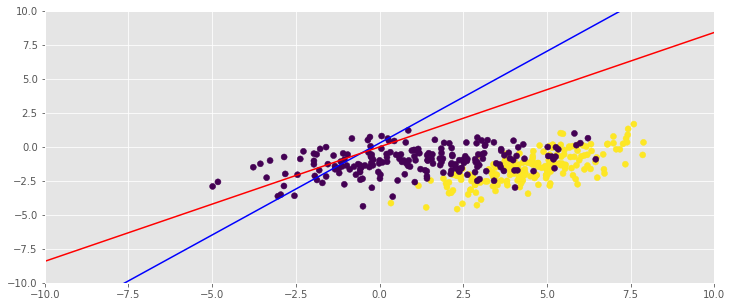

In [164]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator, C=1, model_type='lin_reg', alpha=0.05, border=0.5)
my_clf.fit(X, y)
lin_clf = LinearRegression()
lin_clf.fit(X, y)

lin_x = np.linspace(-10, 10)
lin_y = - ((lin_clf.coef_[0]) * lin_x) / lin_clf.coef_[1]

line1 = plot_decision_boundary(my_clf)
line2, = plt.plot(lin_x, lin_y, '-r', label='sklearn')
print(my_clf.weights)

plt.ylim(-10, 10)
plt.xlim(-10, 10)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [139]:
from sklearn.datasets import make_classification

In [140]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


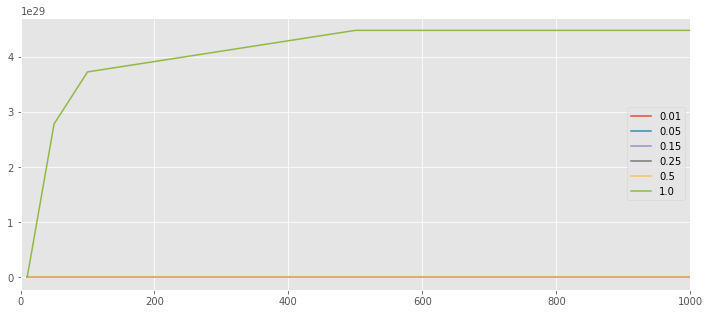

In [141]:
alpha_arr = [0.01, 0.05, 0.15, 0.25, 0.5, 1.0]
N_arr = [10, 50, 100, 500, 1000, 5000, 10000]
lines = []
n = y.size
for alpha in alpha_arr:
    clf = MySGDClassifier(batch_generator, batch_size=n//20, model_type='log_reg', alpha=alpha)
    clf.fit(X, y)
    mean_loss = []
    for N in N_arr:
        mean_loss.append(np.mean(clf.errors_log['loss'][:N]))
    line, = plt.plot(N_arr, mean_loss, label=str(alpha))
    lines.append(line)
plt.xlim(0, 1000)

plt.legend(handles=lines)
plt.show()

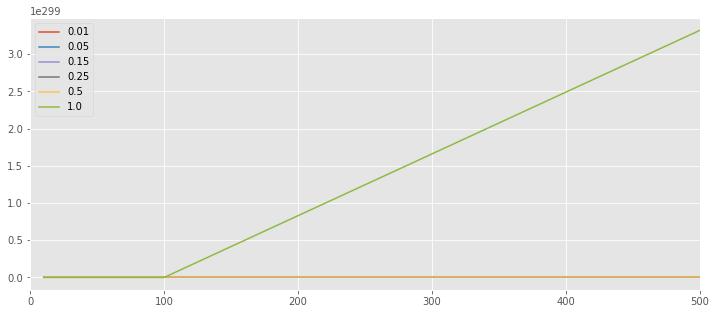

In [142]:
lines = []
for alpha in alpha_arr:
    clf = MySGDClassifier(batch_generator, batch_size=n//20, model_type='lin_reg', alpha=alpha)
    clf.fit(X, y)
    mean_loss = []
    for N in N_arr:
        mean_loss.append(np.mean(clf.errors_log['loss'][:N]))
    line, = plt.plot(N_arr, mean_loss, label=str(alpha))
    lines.append(line)
plt.xlim(0, 1000)
plt.xlim(0, 500)
plt.legend(handles=lines)
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in double_scalars


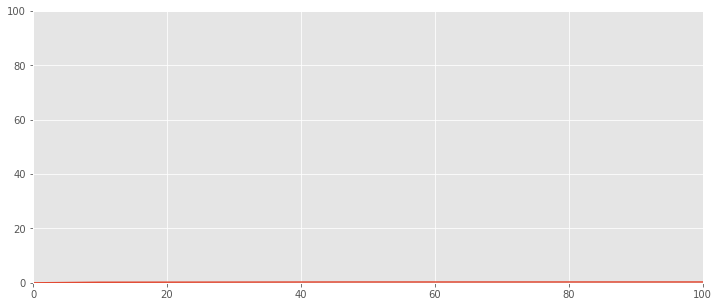

In [143]:
mean_weight_lin = []
mean_weight_log = []
C_arr = np.logspace(3, -3, 10)
for C in C_arr:
    clf = MySGDClassifier(batch_generator, batch_size=n//20, 
                          C=C, model_type='log_reg')
    clf.fit(X, y)
    mean_weight_log.append(np.mean(clf.weights))
plt.plot(C_arr, mean_weight_log)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in double_scalars


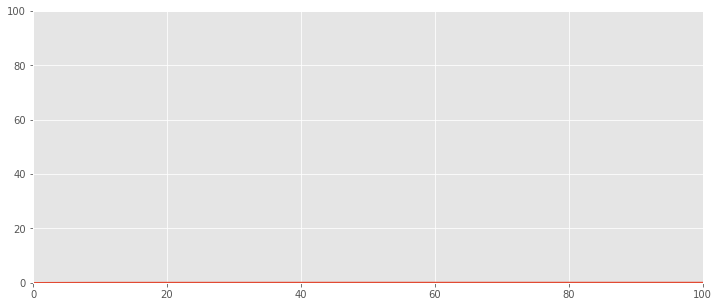

In [144]:
mean_weight_lin = []
mean_weight_log = []
for C in C_arr:
    clf = MySGDClassifier(batch_generator, batch_size=n//20, 
                          C=C, model_type='lin_reg')
    clf.fit(X, y)
    mean_weight_lin.append(np.mean(clf.weights))
plt.plot(C_arr, mean_weight_lin)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [145]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [146]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [147]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [148]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [149]:
st = StandardScaler()
X = st.fit_transform(X_train, y_train)

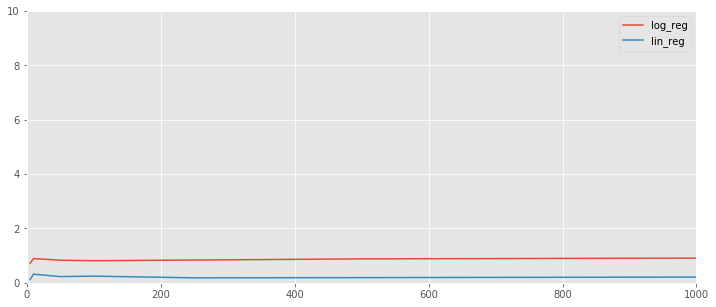

In [150]:
batch_arr = [5, 10, 50, 100, 250, 500, 1000, 5000]
lin_reg_loss = []
log_reg_loss = []
for batch in batch_arr:
    clf = MySGDClassifier(batch_generator,
                             model_type='log_reg',
                             batch_size=batch).fit(X, y_train)
    log_reg_loss.append(clf.errors_log['loss'][-1])
    clf = MySGDClassifier(batch_generator,
                             model_type='lin_reg',
                             batch_size=batch).fit(X, y_train)
    lin_reg_loss.append(clf.errors_log['loss'][-1])
line1, = plt.plot(batch_arr, log_reg_loss, label='log_reg')
line2, = plt.plot(batch_arr, lin_reg_loss, label='lin_reg')
lines = [line1, line2]
plt.legend(handles=lines)
plt.xlim(0, 1000)
plt.ylim(0, 10)
plt.show()

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [152]:
from sklearn.model_selection import KFold

alpha_arr = [0.01, 0.05, 0.15, 0.25, 0.5, 1.0]
C_arr = [0.1, 0.5, 1, 3, 10, 25, 50]
epoch_arr = [10, 20, 50, 100]
max_score = 0.0
best = [0.01, 0.1, 10, 'log_reg']
fold = KFold(n_splits=3, shuffle=True)

for alpha in alpha_arr:
    for C in C_arr:
        for epoch in epoch_arr:
            split = fold.split(X)
            scores = []
            clf = MySGDClassifier(batch_generator, C=C, 
                                  alpha=alpha, max_epoch=epoch,
                                  model_type='log_reg', batch_size=100)
            for index_train, index_test in split:
                clf.fit(X[index_train], y_train[index_train])
                scores.append(f1_score(y_train[index_test],
                                       clf.predict(X[index_test])))
            score = np.mean(np.array(scores))
            if score > max_score:
                best = [alpha, C, epoch, 'log_reg']
                max_score = score
            split = fold.split(X)
            scores = []
            clf = MySGDClassifier(batch_generator,
                                  C=C, alpha=alpha,
                                  max_epoch=epoch,
                                  model_type='lin_reg', batch_size=100)
            for index_train, index_test in split:
                clf.fit(X[index_train], y_train[index_train])
                scores.append(f1_score(y_train[index_test],
                                       (clf.predict(X[index_test]) >= clf.border)
                                       .astype(int)))
            score = np.mean(np.array(scores))
            if score > max_score:
                best = [alpha, C, epoch, 'lin_reg']
                max_score = score
print(best)
print(max_score)

done for set 0.01 0.1 10 
            by log_reg, score = 0.072460728355703


/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


done for set 0.01 0.1 10
            by lin_reg, score = 0.0018382352941176473
done for set 0.01 0.1 20 
            by log_reg, score = 0.06647230710190921
done for set 0.01 0.1 20
            by lin_reg, score = 0.0023312588390167954
done for set 0.01 0.1 50 
            by log_reg, score = 0.04850679798033473
done for set 0.01 0.1 50
            by lin_reg, score = 0.002323225884136192
done for set 0.01 0.1 100 
            by log_reg, score = 0.07732158782328456
done for set 0.01 0.1 100
            by lin_reg, score = 0.004589787722317843
done for set 0.01 0.5 10 
            by log_reg, score = 0.4721361382847095
done for set 0.01 0.5 10
            by lin_reg, score = 0.11982909459171327
done for set 0.01 0.5 20 
            by log_reg, score = 0.46508793261580056
done for set 0.01 0.5 20
            by lin_reg, score = 0.12274490867090633
done for set 0.01 0.5 50 
            by log_reg, score = 0.46932594894912943
done for set 0.01 0.5 50
            by lin_reg, score = 0.1063

done for set 0.05 50 50
            by lin_reg, score = 0.420859193690875
done for set 0.05 50 100 
            by log_reg, score = 0.46406955151268786
done for set 0.05 50 100
            by lin_reg, score = 0.5131717391146017


/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in double_scalars


done for set 0.15 0.1 10 
            by log_reg, score = 0.6108544375920612


/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in matmul
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in matmul
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater_equal


done for set 0.15 0.1 10
            by lin_reg, score = 0.0


/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in matmul
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: overflow encountered in true_divide
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in matmul
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in matmul
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in matmul


done for set 0.15 0.1 20 
            by log_reg, score = 0.0
done for set 0.15 0.1 20
            by lin_reg, score = 0.0
done for set 0.15 0.1 50 
            by log_reg, score = 0.0
done for set 0.15 0.1 50
            by lin_reg, score = 0.0
done for set 0.15 0.1 100 
            by log_reg, score = 0.0


/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in subtract


done for set 0.15 0.1 100
            by lin_reg, score = 0.0
done for set 0.15 0.5 10 
            by log_reg, score = 0.47023292897458197
done for set 0.15 0.5 10
            by lin_reg, score = 0.6147025641631498
done for set 0.15 0.5 20 
            by log_reg, score = 0.4482145880107978
done for set 0.15 0.5 20
            by lin_reg, score = 0.0
done for set 0.15 0.5 50 
            by log_reg, score = 0.46310613689472674
done for set 0.15 0.5 50
            by lin_reg, score = 0.0
done for set 0.15 0.5 100 
            by log_reg, score = 0.46563194903857075
done for set 0.15 0.5 100
            by lin_reg, score = 0.0
done for set 0.15 1 10 
            by log_reg, score = 0.5148175837367366
done for set 0.15 1 10
            by lin_reg, score = 0.614907976082837
done for set 0.15 1 20 
            by log_reg, score = 0.5154656398716716
done for set 0.15 1 20
            by lin_reg, score = 0.6151374308297076
done for set 0.15 1 50 
            by log_reg, score = 0.50031554717

done for set 0.5 0.5 50 
            by log_reg, score = 0.6151635986162783
done for set 0.5 0.5 50
            by lin_reg, score = 0.0
done for set 0.5 0.5 100 
            by log_reg, score = 0.6151899402445601
done for set 0.5 0.5 100
            by lin_reg, score = 0.0
done for set 0.5 1 10 
            by log_reg, score = 0.6155287435188481
done for set 0.5 1 10
            by lin_reg, score = 0.0
done for set 0.5 1 20 
            by log_reg, score = 0.6134797733876817
done for set 0.5 1 20
            by lin_reg, score = 0.0
done for set 0.5 1 50 
            by log_reg, score = 0.6143486432120632
done for set 0.5 1 50
            by lin_reg, score = 0.0
done for set 0.5 1 100 
            by log_reg, score = 0.6149350309904668
done for set 0.5 1 100
            by lin_reg, score = 0.0
done for set 0.5 3 10 
            by log_reg, score = 0.5182258294878043
done for set 0.5 3 10
            by lin_reg, score = 0.0
done for set 0.5 3 20 
            by log_reg, score = 0.4881364

/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: overflow encountered in multiply


done for set 1.0 0.1 10 
            by log_reg, score = 0.0
done for set 1.0 0.1 10
            by lin_reg, score = 0.0
done for set 1.0 0.1 20 
            by log_reg, score = 0.0
done for set 1.0 0.1 20
            by lin_reg, score = 0.0
done for set 1.0 0.1 50 
            by log_reg, score = 0.0
done for set 1.0 0.1 50
            by lin_reg, score = 0.0
done for set 1.0 0.1 100 
            by log_reg, score = 0.0
done for set 1.0 0.1 100
            by lin_reg, score = 0.0
done for set 1.0 0.5 10 
            by log_reg, score = 0.0
done for set 1.0 0.5 10
            by lin_reg, score = 0.0
done for set 1.0 0.5 20 
            by log_reg, score = 0.0
done for set 1.0 0.5 20
            by lin_reg, score = 0.0
done for set 1.0 0.5 50 
            by log_reg, score = 0.0
done for set 1.0 0.5 50
            by lin_reg, score = 0.0
done for set 1.0 0.5 100 
            by log_reg, score = 0.0
done for set 1.0 0.5 100
            by lin_reg, score = 0.0
done for set 1.0 1 10 
     

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [178]:
border_arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
C = best[0]
alpha = best[1]
max_epoch = best[2]
model_type = best[3]
max_score = 0.0
best_border = 0.0
for border in border_arr:
    clf = MySGDClassifier(batch_generator, C=C, alpha=alpha, 
                           max_epoch=max_epoch, model_type=model_type, 
                           batch_size=100, border=border)       
    split = fold.split(X)
    scores = []
    for index_train, index_test in split:
        clf.fit(X[index_train], y_train[index_train])
        scores.append(f1_score(y_train[index_test],
                               clf.predict(X[index_test])))
    score = np.mean(np.array(scores))
    if score > max_score:
        max_score = score
        best_border = border
    print('done for border {}, score = {}'.format(border, score))
print(max_score)
print(best_border)

/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: overflow encountered in true_divide
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in matmul
/home/alex/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in matmul


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import pandas as pd

test = pd.read_csv('test_groups.csv')
test_grps_title = {}
for i in range(len(test)):
    new_doc = test.iloc[i]
    doc_id = new_doc['doc_id']
    group = new_doc['group_id']
    title = doc_to_title[doc_id]
    if group not in test_grps_title:
        test_grps_title[group] = []
    test_grps_title[group].append((doc_id, title))

X_test = []
groups_test = []
for new_group in test_grps_title:
    test_docs = test_grps_title[new_group]
    for doc_num, (doc_id, title) in enumerate(test_docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for k in range(0, len(test_docs)):
            if doc_num == k:
                continue
            cur_doc_id, cur_title = test_docs[doc_num]
            cur_words = set(cur_title.strip().split())
            all_dist.append(len(words.intersection(cur_words)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)
print(groups_test)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [ ]:
clf = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch,
                      model_type=model_type, batch_size=100, 
                      border=border).fit(X, y_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
print(X_test.shape)

y = clf.predict(X_test)
uniq, counts = np.unique(y, return_counts=True)
print(counts)
r = range(11691, 28318)
print(len(r))
data = {'pair_id' : range(11691, 28318), 'target': y}
res = pd.DataFrame(data)
res.to_csv('sec_pred.csv', index=False)

data = {'pair_id' : range(11691, 28318), 'target': y}
res = pd.DataFrame(data)
res.to_csv('sec_pred.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***